# Polynomial Regression
So according to the visualizations from the <a href="https://github.com/lynstanford/machine-learning-projects/machine-learning/multiple_regression.ipynb">Linear Regression</a> notebook, the connection between the dependent and independent variables appear to be strongly linear in relationship although the connection between the 'Volume' of daily bitcoin bought and sold has less association with the daily 'Close' price. 

Fitting a Linear Regression line to the data may be accurate in this case, with an R2 value of 0.9991392014437468 and RMSE of 689.1925598643533. However, out of curiosity I decided to see if a Polynomial function could fit the line slightly better by employing a regularization technique to try and improve the bias term by decreasing the Mean Squared Error.

The r-squared value is used to represent the overall accuracy score and directly measures the degree of variability associated between the predictors and target variable. The root mean squared value is represented as a loss function and my aim is to reduce its overall value as much as possible using regularization.

## Import Data
Keeping the data loading simple this time will reduce the overall time it takes to retrieve.

In [1]:
# import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

# import data from filepath
btc_cad = pd.read_csv("C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/BTC_CAD.csv")

# storing dataset from filepath into new dataframe
bitcoin = pd.DataFrame(btc_cad).dropna(axis=0)

This provides the entire dataset with all the values stored in a single dataframe.

## Feature Selection and Scaling
Checking to see what features are present within the current dataframe:

In [2]:
# all column names
bitcoin.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Now to remove the columns I don't need including 'Date' and 'Adj Close', selecting only the remaining ones to include in the X variable such as 'Open', 'High', 'Low' and 'Volume'. The remaining column of 'Close' in the same dataframe will be used as the target variable output, y.

In [3]:
# remove feature with string values - Date
del bitcoin['Date']

# remove adj close as I will not be using this
del bitcoin['Adj Close']

# see the remaining features
bitcoin.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

Assigning features to X gives:

In [4]:
# select features as X dataframe
X = bitcoin[['Open','High','Low','Volume','Close']]
print(X)

         Open      High       Low        Volume     Close
0     9718.07   9838.33   9728.25  4.624843e+10   9763.94
1     9762.68  10125.87   9747.39  4.716635e+10  10096.28
2    10102.09  10533.73  10009.76  6.119120e+10  10451.16
3    10457.43  10678.71  10457.43  4.881932e+10  10642.81
4    10642.22  10773.18  10601.61  4.643028e+10  10669.64
..        ...       ...       ...           ...       ...
360  79368.23  79831.47  75262.20  1.050000e+11  77018.32
361  76964.70  78268.41  75503.00  8.272967e+10  75906.36
362  75928.95  76373.72  66081.83  1.220000e+11  70374.91
363  70344.11  71803.61  68107.27  8.183693e+10  69788.23
365  71509.30  71556.76  71132.08  8.495634e+10  71477.76

[362 rows x 5 columns]


Comparing the shape of the overall dataset before polynomial regression and before splitting gives:

In [5]:
X.shape

(362, 5)

In [6]:
# select target as y series
y = bitcoin[['Close']]
print(y)

        Close
0     9763.94
1    10096.28
2    10451.16
3    10642.81
4    10669.64
..        ...
360  77018.32
361  75906.36
362  70374.91
363  69788.23
365  71477.76

[362 rows x 1 columns]


In [7]:
y.shape

(362, 1)

Another way to select the right column vectors is using indexation.

In [8]:
X = X.iloc[:,0:5].values
print(X[0:10])

[[9.71807000e+03 9.83833000e+03 9.72825000e+03 4.62484281e+10
  9.76394000e+03]
 [9.76268000e+03 1.01258700e+04 9.74739000e+03 4.71663519e+10
  1.00962800e+04]
 [1.01020900e+04 1.05337300e+04 1.00097600e+04 6.11912020e+10
  1.04511600e+04]
 [1.04574300e+04 1.06787100e+04 1.04574300e+04 4.88193179e+10
  1.06428100e+04]
 [1.06422200e+04 1.07731800e+04 1.06016100e+04 4.64302791e+10
  1.06696400e+04]
 [1.06699200e+04 1.08566800e+04 1.06576200e+04 4.66636415e+10
  1.08366800e+04]
 [1.08360400e+04 1.09416000e+04 1.08360400e+04 5.07557760e+10
  1.09416000e+04]
 [1.09435200e+04 1.09270500e+04 1.08227000e+04 4.64088816e+10
  1.09171200e+04]
 [1.09166300e+04 1.23147700e+04 1.08593000e+04 8.35291405e+10
  1.22114700e+04]
 [1.22067900e+04 1.31051300e+04 1.19009200e+04 9.34508816e+10
  1.20832400e+04]]


In [9]:
y = y.iloc[:, ].values
print(y[0:10])

[[ 9763.94]
 [10096.28]
 [10451.16]
 [10642.81]
 [10669.64]
 [10836.68]
 [10941.6 ]
 [10917.12]
 [12211.47]
 [12083.24]]


Does the dataset need re-scaling? In this particular case the (X) predictors include 3 price variables and 1 volume variable which is scaled differently. The (y) target variable is another price variable, so the data would benefit from re-scaling. The transformation I have chosen will shift the values to a range between 0 and 1 for each column. 

Make a copy of the dataframe first.

In [10]:
bitcoin = bitcoin.copy()

In [11]:
# import preprocessing from sci-kit learn
from sklearn import preprocessing

# define min max scaler
min_max_scaler = preprocessing.MinMaxScaler()

# transform data
X_scaled = min_max_scaler.fit_transform(X)

bitcoin_features = pd.DataFrame(X_scaled)

bitcoin_features.to_csv(r'C:\Users\lynst\Documents\GitHub\machine-learning-projects\machine-learning\bitcoin_features.csv', index = False, header = True)

print(bitcoin_features)

            0         1         2         3         4
0    0.000000  0.000000  0.000000  0.068801  0.000000
1    0.000638  0.004016  0.000281  0.070934  0.004759
2    0.005493  0.009711  0.004140  0.103523  0.009841
3    0.010577  0.011736  0.010724  0.074775  0.012585
4    0.013220  0.013055  0.012844  0.069224  0.012969
..        ...       ...       ...       ...       ...
357  0.996343  0.977458  0.963766  0.205318  0.963054
358  0.961961  0.955629  0.967307  0.153570  0.947131
359  0.947145  0.929170  0.828756  0.244820  0.867923
360  0.867254  0.865348  0.858543  0.151496  0.859522
361  0.883922  0.861901  0.903027  0.158744  0.883716

[362 rows x 5 columns]


Repeating this process for the y values:

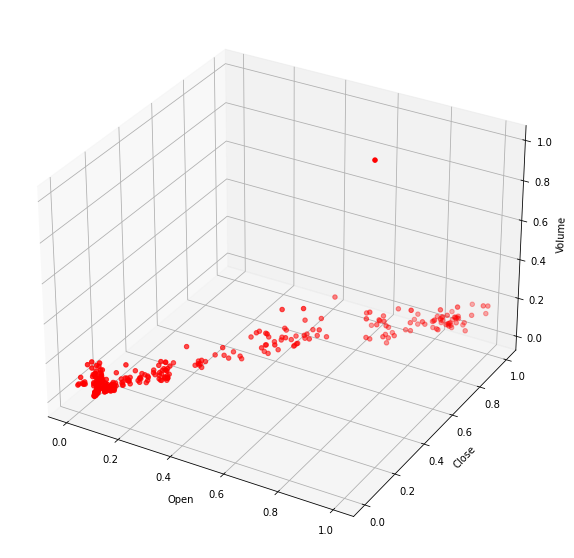

In [12]:
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

x = bitcoin_features.iloc[0:362,:1]
y = bitcoin_features.iloc[0:362,-1:]
z = bitcoin_features.iloc[0:362,3:4]

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel("Open")
ax.set_ylabel("Close")
ax.set_zlabel("Volume")
plt.show()   

So for this particular comparison between the open and close prices and volume of Bitcoin transactions I can see a positive linear relationship between 'Open' and 'Close' prices. As one increases in value, so does the other. The relationship they have with 'Volume' appears somewhat linear also except for and outlier when volume spiked on Feb 26th, 2021. This was apparently due to bets by Tesla and Mastercard and stood out significantly compared to anything seen previously this year.

Next I will perform both linear regression and polynomial regression to display prediction lines of best fit. I will only display the 'Close' price vs 'Date', so just two variables. I have chosen to manipulate data for price and time and store them in a new array called 'btc_new'.

In [13]:
# import data from filepath
btc_cad = pd.read_csv("C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/BTC_CAD.csv")
# storing dataset from filepath into new dataframe
bitcoin = pd.DataFrame(btc_cad).dropna(axis=0)

I have decided to create a new data array containing the variables for date and the daily close price, having converted the dates to straight forward number of days (ranging from 1 to 362), the same as the total number of entries.

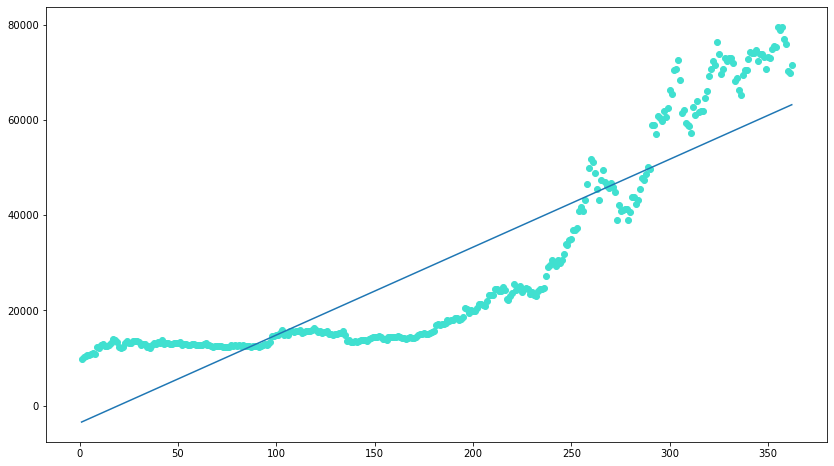

In [27]:
# Visualising the Linear Regression results
figure = plt.figure(figsize=(14,8))

x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,
     40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,
     76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,
     109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,
     136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,
     163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,
     190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,
     217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,
     244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,
     271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,
     298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,
     325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,
     352,353,354,355,356,357,358,359,360,361,362]
y = [9763.94,10096.28,10451.16,10642.81,10669.64,10836.68,10941.6,10917.12,12211.47,12083.24,12644.26,12820.88,
     12576.13,12551.25,12642.56,13128.23,13904.59,13795.97,13448.25,12194.49,12061.87,12397.94,13062.2,13659.96,
     13162.55,13228.95,13627.94,13559.83,13560.94,13241.13,12666.33,12857.9,12895.3,12293.22,12445.06,12177.47,
     12630.37,13121.03,13000.03,13359.9,13034.29,13812.49,12873.86,13031.1,13233.33,12972.79,12956.88,13071.93,
     13063.21,13147.35,13253.52,12711.01,12883.57,12876.0,12803.02,12791.0,12907.76,12871.53,12793.94,12640.25,
     12700.57,12668.61,13028.33,13041.35,12707.97,12634.47,12541.29,12380.43,12506.51,12552.25,12404.78,12543.14,
     12380.24,12313.75,12374.98,12296.15,12693.78,12588.0,12745.56,12599.85,12614.86,12556.24,12613.8,12580.1,
     12571.09,12417.11,12394.21,12428.28,12437.98,12469.29,12395.2,12604.21,12781.59,12843.04,12796.08,12982.28,
     13288.45,14662.38,14600.23,14809.4,14902.15,15186.41,15771.32,14809.83,15064.88,14900.92,15582.92,15690.25,
     15529.15,15733.03,15633.23,15862.41,15187.81,15342.8,15581.58,15614.35,15742.82,15761.58,16203.14,15775.92,
     15535.99,15648.99,15273.86,15391.56,15375.86,15563.07,14964.79,15097.17,14859.35,15119.23,15072.56,15319.24,
     15230.27,15626.5,14891.18,13462.52,13731.63,13284.56,13442.84,13579.41,13413.77,13471.4,13668.72,13705.81,
     13760.17,13609.86,14073.93,14244.94,14466.7,14398.2,14452.49,14650.47,14436.9,13916.7,14013.41,13690.02,
     14346.23,14325.02,14397.66,14417.81,14322.13,14520.83,14357.78,14115.09,14089.38,14063.2,14203.03,14325.21,
     14149.28,14160.03,14410.83,14818.74,14949.65,15031.95,15206.57,14936.71,14984.18,15137.27,15487.81,15634.23,
     16869.5,17032.64,16973.62,17205.31,17133.71,17267.45,18012.41,17666.01,17893.39,18045.32,18357.66,18364.88,
     17915.13,18279.6,18553.15,20383.97,20332.17,19375.87,20159.37,19945.73,19926.42,20504.46,21384.43,21423.16,
     21095.38,20937.96,21858.82,23126.07,23303.57,23320.17,24380.23,24407.62,24036.96,24010.26,24836.84,24356.4,
     22332.26,22226.46,23017.67,23600.83,25498.36,24319.8,24803.39,25023.04,23905.97,24486.96,24726.68,24572.39,
     23481.02,23800.7,23272.47,23059.65,24014.9,24409.37,24561.12,24658.5,27166.03,29036.47,29589.87,30525.81,
     30075.87,29308.0,30662.86,29851.39,30529.54,31754.68,34036.36,33737.04,34786.05,35085.89,36777.84,36919.19,
     37393.09,40898.17,41711.19,40865.06,43089.99,46641.22,49945.91,51769.03,51079.4,48817.74,45432.6,43108.25,
     47383.3,49563.35,46905.54,46081.14,45711.01,46701.33,45888.95,44892.29,38992.07,42028.71,40834.13,41094.11,
     41229.38,41341.23,39009.81,40608.72,43844.33,43794.73,42390.85,43093.59,45408.61,47908.07,47359.34,48683.77,
     50115.41,49642.27,58850.14,59023.47,57035.0,60845.81,60319.29,59816.94,61818.59,60583.38,62545.24,66229.13,
     65537.27,70533.62,70772.35,72505.56,68363.29,61493.78,62195.54,59404.52,59028.47,58830.69,57312.2,62739.6,
     61132.9,64055.45,61573.38,61913.1,61894.22,64684.29,66138.41,69333.05,70691.19,72463.92,71526.08,76406.88,
     73947.62,69760.45,70684.33,72931.8,72297.91,73079.59,73038.24,72043.42,68277.85,68917.98,66392.34,65160.43,
     69541.94,70596.59,70416.7,72713.56,74365.91,74029.63,74156.38,74675.77,72436.89,73827.42,73942.95,73156.52,
     70708.54,73273.84,72978.66,74918.53,75463.91,75243.42,79598.41,78995.98,79437.88,77018.32,75906.36,70374.91,
     69788.23,71477.76]

mymodel = np.poly1d(np.polyfit(x, y, 1))

myline = np.linspace(1, 362, 80000)

plt.scatter(x, y, color = 'turquoise')
plt.plot(myline, mymodel(myline))
plt.show()

This would represent a highly positive linear relationship between price and time over the last year, specifically a low-bias and high variance regression line, or an 'under-fitted' model.

Making sure the values work print them out.

In [24]:
print(x)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

In [25]:
print(y)

[9763.94, 10096.28, 10451.16, 10642.81, 10669.64, 10836.68, 10941.6, 10917.12, 12211.47, 12083.24, 12644.26, 12820.88, 12576.13, 12551.25, 12642.56, 13128.23, 13904.59, 13795.97, 13448.25, 12194.49, 12061.87, 12397.94, 13062.2, 13659.96, 13162.55, 13228.95, 13627.94, 13559.83, 13560.94, 13241.13, 12666.33, 12857.9, 12895.3, 12293.22, 12445.06, 12177.47, 12630.37, 13121.03, 13000.03, 13359.9, 13034.29, 13812.49, 12873.86, 13031.1, 13233.33, 12972.79, 12956.88, 13071.93, 13063.21, 13147.35, 13253.52, 12711.01, 12883.57, 12876.0, 12803.02, 12791.0, 12907.76, 12871.53, 12793.94, 12640.25, 12700.57, 12668.61, 13028.33, 13041.35, 12707.97, 12634.47, 12541.29, 12380.43, 12506.51, 12552.25, 12404.78, 12543.14, 12380.24, 12313.75, 12374.98, 12296.15, 12693.78, 12588.0, 12745.56, 12599.85, 12614.86, 12556.24, 12613.8, 12580.1, 12571.09, 12417.11, 12394.21, 12428.28, 12437.98, 12469.29, 12395.2, 12604.21, 12781.59, 12843.04, 12796.08, 12982.28, 13288.45, 14662.38, 14600.23, 14809.4, 14902.15, 151

Applying a polynomial degree of 2 this time provides an exponential curve.

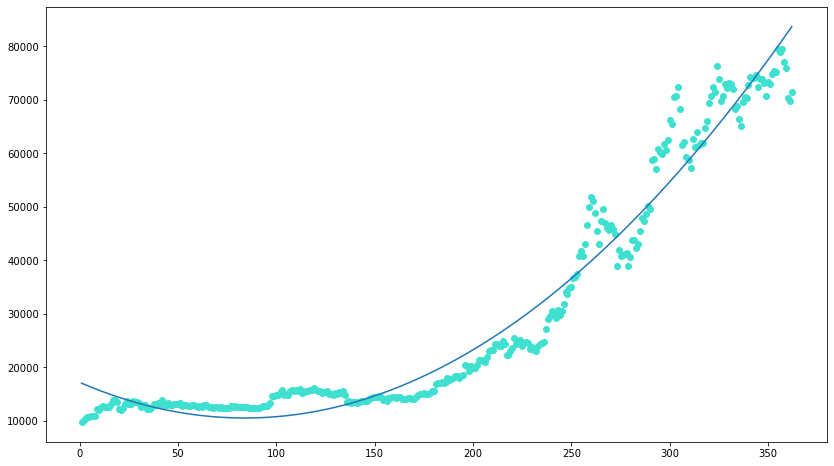

In [29]:
figure = plt.figure(figsize=(14,8))

mymodel = np.poly1d(np.polyfit(x, y, 2))

myline = np.linspace(1, 362, 80000)

plt.scatter(x, y, color = 'turquoise')
plt.plot(myline, mymodel(myline))
plt.show()

C:\Users\lynst\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


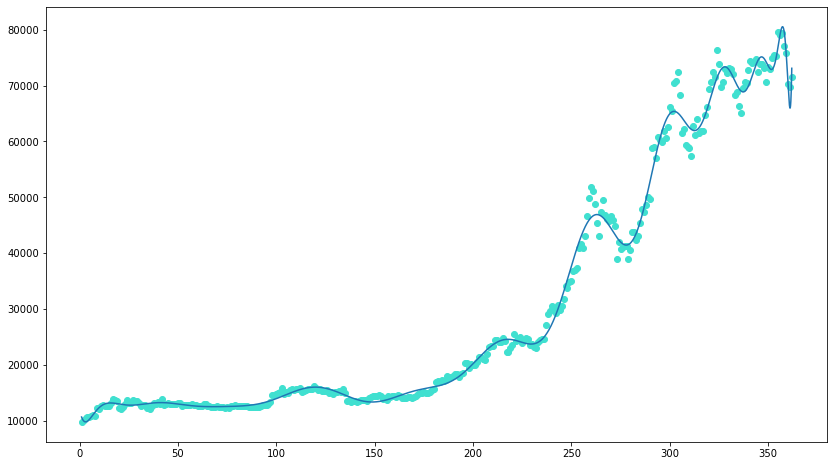

In [34]:
figure = plt.figure(figsize=(14,8))

mymodel = np.poly1d(np.polyfit(x, y, 50))

myline = np.linspace(1, 362, 80000)

plt.scatter(x, y, color = 'turquoise')
plt.plot(myline, mymodel(myline))
plt.show()

In essence, this represents 'over-fitting' and a high-bias (low variance) model.

In [35]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(x, y)

ValueError: Expected 2D array, got 1D array instead:
array=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252
 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270
 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288
 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306
 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324
 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342
 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358 359 360
 361 362].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

Visualising the linear regression first.

Now to fit the polynomial regression using the training or learning phase, before the prediction or validation phase.

In [ ]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
 
poly = PolynomialFeatures(degree = 4)
X_poly = poly.fit_transform(x)
  
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)

Having established a more comparible set of values for the entire dataset, I can proceed with application of my Polynomial model.

## Split the Dataset
First I've decided to import the train_test_split function to split the dataset into respective training and test sets (for both X and y values in each set).

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Next, a linear regression model is applied and visualized to see how well the prediction line fits.

## Train Linear Regression Model
Train the linear model on the data and fit a regression line.

In [ ]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Visualizing the Linear Regression results
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X), color='blue')
    plt.title('Truth or Bluff (Linear Regression)')
    plt.xlabel('Position level')
    plt.ylabel('Salary')
    plt.show()
    return
viz_linear()


'''
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
'''


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

pf = PolynomialFeatures(degree=2)
poly_X = pf.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size=0.3, random_state=0)

from sklearn.linear_model import Ridge
reg_regression = Ridge(alpha=0.1, normalize=True)
reg_regression.fit(X_train, y_train)
print('R2: %0.3f' %r2_score(y_test,reg_regression.predict(X_test)))

## Predicting Against Test Set
Now to predict the test set results.

In [ ]:
y_pred = lin_reg.predict(X_test)

# to see the first ten results
y_pred[0:10]

Comparing the first row of X values to predict the y value by copying from the dataset output from cell 1. Remember only to use the 'Open', 'High', 'Low' and 'Volume' values.

In [ ]:
lin_reg.predict([[9718.07, 9838.33, 9728.25, 4.624843e+10]])

So the predicted y value is 9777.86 and the actual y value (from output of cell 1 for 'Close' price) is 9763.94, which is reasonably similar.

## Model Evaluation
This is where I need to look into the root mean squared error and R-squared values to see how well the model is performing.

In [ ]:
# import the score measure
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

## Visualization
Plotting the actual and predicted results for the 'Close' price and fitting a regression line provides us with a nice visual display.

In [ ]:
plt.figure(figsize=(15,10))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs. Predicted Prices")

## Predictions
Storing the actual and predicted values and their difference in a dictionary object becomes useful. The larger the error, the greater the variance and subsequent standard deviation which translates to less accurate predictions and a less reliable model. 

Why does this become important? The main purpose of this exercise is to see how useful my model would be in predicting the daily closing price so the first information I can derive from the scatter plot above shows the relationship between independent and dependent variables is strong, but also incredibly linear. It may not pay off to apply Polynomial Regression in such circumstances but may improve the linear fit to the data points with increasing degrees of freedom.

In [ ]:
predictions = pd.DataFrame({"Actual": y_test, "Predicted": y_pred, "Error": y_test - y_pred})
predictions[0:20]

Exploring the entire dataset (all the X and y values) and the degree of accuracy by fitting a linear regression predictive line once more:

In [ ]:
# converting the dictionary value objects
X = predictions[y_test].values
y = predictions[y_pred].values

# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# Visualizing the Linear Regression results
import matplotlib.pyplot as plt
def viz_linear():
    plt.scatter(X, y, color='red')
    plt.plot(X, lin_reg.predict(X, color='blue')
    plt.title('Actual vs. Predicted Bitcoin Prices')
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.show()
    return
viz_linear()

In [ ]:
import seaborn as sns

# set the width and height of the plot
plt.figure(figsize=(7,7))

# visualizing the relationship between actual and predicted values for y
plt.scatter(y_test, price_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

# fit a regression line between high and low values to show linear nature
sns.regplot(x=y_test, y=price_predictions)

## Training the Polynomial model
Importing the relevant libraries and instantiating the polynomial function model followed by splitting the data into training and validation sets. The first stage will produce an expanded feature set for the entire dataframe with quadratic terms (degree=2). I will attempt to tune this hyperparameter later to see if it can optimize the Loss function.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

# initialize the model for a given degree
poly_features = PolynomialFeatures(degree=2, include_bias=True)
  
# transforms the existing features to higher degree features.
poly_X = poly_features.fit_transform(X)

Using indexation to return any value in X, say the 1st value

In [ ]:
X[:1]

Now repeating for the data contained in the 'poly_X' set and we can see that there are 15 values returned so it has created an array with 11 new features for a total of 15 features. This includes element-wise dot product values and some squared values (without going into too much detail). Both the original feature values for 'X1' to 'Xn' and the feature squared value from 'poly_X' are returned in this example.

In [ ]:
poly_X[:1]

Saving the current dataframe to a CSV formatted file (or an Excel file) for preservation to view the degree of newly expanded features in a fresh table.

In [ ]:
df.to_csv(r'C:/Users/lynst/Documents/GitHub/machine-learning-projects/machine-learning/X_train_poly.csv', index=False, header=True)

### Splitting the Data
Using this data for the Polynomial Features model and splitting it into training and test sets with a 70-30 split. 

In [ ]:
# then split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(poly_X, y, test_size = 0.3, random_state = 42)

The number of entries (rows) by the number of features (cols):

In [ ]:
print(X.shape)
print(y.shape)

But the shape of the new dataset with all the extended features is much larger.

In [ ]:
print(poly_X.shape)

Printing out the shape of the training set from the polynomial data gives:

In [ ]:
print(X_train.shape)
print(y_train.shape)

And the shape of the test data:

In [ ]:
print(X_test.shape)
print(y_test.shape)

### Applying Linear Regression First

In [ ]:
from sklearn.linear_model import LinearRegression

# fit the transformed features to Linear Regression
linear_regression = LinearRegression()

# fit the model to training set only!!!
linear_regression.fit(poly_X, y)

### Making a Prediction
Comparing actual and predicted 'Close' prices between labelled and target data in the test set tells me that the accuracy isn't great and there seems to be considerable variance.

In [ ]:
poly_y_pred = linear_regression.predict(poly_X)
#predictions = pd.DataFrame(poly_y_pred)

#print("Predictions: ", linear_regression.predict(poly_X.iloc[:4]))
#print("Actual: ", poly_X.iloc[:1])


In [ ]:
print(y.shape)

Comparing predictions for training set and test set values

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns

mse = mean_squared_error(y_test, y_test_pred)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

# set the width and height of the plot
plt.figure(figsize=(6,6))

# visualizing the relationship between actual and predicted values for y
plt.scatter(y_test, y_test_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

# fit a regression line between high and low values to show linear nature
sns.regplot(x=y_test, y=y_test_pred)

# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
  
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("\n")

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))
  
print("\n")
  
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

print("\n")

Defining the intercept of the polynomial line and coefficient values for x1, x2 ... xn.

In [ ]:
ridge_regression.intercept_
ridge_regression.coef_

Given:

y = a + b1x1 + b2x2 + b3x3 + b4x4

### Utilizing Regularization
In this particular instance I have chosen L2 regularization which will penalize the Loss (or cost) function by summing the coefficients and equalizing features which exhibit strong colinearity, while simultaneously reducing the effect of redundant coefficients. (See the colinearity matrix in the previous <a href="https://github.com/lynstanford/machine-learning-projects/machine-learning/multiple_regression.ipynb">Linear Regression</a> model).
    
Note, I have two hyperparameters I can adjust here including 'alpha' and 'normalize'. The 'alpha' value is the learning rate which controls the size of the incremental steps for the learning rate and the 'normalize' adjustment will re-scale the feature values between 0 and 1 for each observation in the dataset.

In [ ]:
from sklearn import linear_model

# initialize ridge regression
ridge_regression = linear_model.Ridge(alpha=0.1, normalize=True)

# fit the model to training set only!!!
ridge_regression.fit(X_train, y_train)

The regularization term should only be added to the cost function during the training phase. Now the 'training' data has been fit, it becomes important to discover the performance measure on the unregularized test set. Making a prediction on the first 5 values in the test set first.

In [ ]:
y_test_pred = ridge_regression.predict(X_test)
print("Predictions: ", ridge_regression.predict(X_test.iloc[:5]))

Defining the intercept of the polynomial line and coefficient values for x1, x2 ... xn.

In [ ]:
ridge_regression.intercept_
ridge_regression.coef_

Given:

    y = a + b1x1 + b2x2 + b3x3 + b4x4

This tells me the prediction for the target output variable, y, based on the input variables specified and using ridge regression giving the value of C$37,990.99.

## Model Validation Metrics¶
Now to measure the error score and accuracy of the line of fit.

## Applying Regularization
To avoid overfitting regularization can be applied, but will require tuning hyperparameters manually to an extent. To see if I can improve on the linear regression model's ability to predict the target variable, I have decided to use Ridge Regression.
This regularization term basically employs the use of a penalization method by summing the squared values of each coefficient (whether positive or negative) and helps balance the contribution of all the features but this term is only used during the training phase so I need to remove it for the purpose of testing and evaluation.

## Model Selection
### Ridge Regression
Trying a slightly different type of regression model using the alpha learning rate hyperparameter of 1.0 to see if I can reduce the (rmse) error value and increase the (r2) accuracy score. The purpose of using a ridge regression model is to try to reduce or eliminate the coefficient values of all the various features (especially those with high multi-colinearity between predictors) and will increase bias slightly but should decrease variance significantly. Ridge regression achieves this by assigning equal weights to those coefficient values which have high colinearity.

In [ ]:
# instantiate model
ridge_regression = linear_model.Ridge(alpha=1.0)

# fit model
ridge_regression.fit(X_train, y_train)

The regularization term should only be added to the cost function during the training phase. Now the 'training' data has been fit, it becomes important to discover the performance measure on the unregularized test set. Making a prediction on the first 5 values in the test set first.

In [ ]:
price_predictions = ridge_regression.predict(X_test)
print("Predictions: ", ridge_regression.predict(X_test.iloc[:5]))

This tells me the prediction for the target output variable, y, based on the input variables specified and using ridge regression giving the value of C$37,990.99.

## Model Validation Metrics¶
Now to measure the error score and accuracy of the line of fit.

This new data matrix containing the additional features with the squared values has been created by expanding the number of features and the parameter weights (or coefficients) which represent a quadratic equation. The linear regression model should now be applied again to this newly expanded dataframe containing the polynomial features.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, price_predictions)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

# set the width and height of the plot
plt.figure(figsize=(6,6))

# visualizing the relationship between actual and predicted values for y
plt.scatter(y_test, price_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

# fit a regression line between high and low values to show linear nature
sns.regplot(x=y_test, y=price_predictions)

In [ ]:
print("R-squared: ", ridge_regression.score(X_test, y_test))

Producing a scatter plot of the data points to display actual vs predicted prices and the regression line of best fit.

In [ ]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, price_predictions)
print(mse)

rmse = np.sqrt(mse)
print(rmse)

# set the width and height of the plot
plt.figure(figsize=(6,6))

# visualizing the relationship between actual and predicted values for y
plt.scatter(y_test, price_predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Prices vs Predicted Prices")

# fit a regression line between high and low values to show linear nature
sns.regplot(x=y_test, y=price_predictions)

In [ ]:
print(ridge_regression.intercept_)
print(ridge_regression.coef_)

This is a slight improvement on the original R-squared score and I can see that the RMSE hasn't really changed.
Trying to improve on the scores above, I decided to introduce a Polynomial model which should be able to fit the line more accurately to the data points.

## Using a Pipeline
The next method involves placing the expanded polynomial features and linear regression of these within a pipeline which can be trained and used to predict the target variable.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('reg', LinearRegression(normalize=True))
    ])

pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)
print(y_train_pred)

Next I wanted to find the shape of the matrices involved and now these datasets have been expanded by the polynomial model I want to make sure they have the same dimensions (m.n) otherwise the polynomial regression won't work.

In [ ]:
print(X_train.shape)

In [ ]:
print(y_train.shape)

In [ ]:
print(y_train_pred.shape)

In [ ]:
# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# print the RMSE metric and R2 accuracy score
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

The metrics from using the 2nd order quadratic coefficients and terms on the training set, a significant improvement.

In [ ]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('reg', LinearRegression(normalize=True))
    ])

pipeline.fit(X_test, y_test)
y_test_pred = pipeline.predict(X_test)
print(y_test_pred)

The metrics from generalizing to the test set data for the quadratic equation.

In [ ]:
# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# print the RMSE metric and R2 accuracy score
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

In [ ]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('reg', LinearRegression(normalize=True))
    ])

pipeline.fit(X_train, y_train)
y_train_pred = pipeline.predict(X_train)
print(y_train_pred)

# evaluating the model on training dataset
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# print the RMSE metric and R2 accuracy score
print("\n")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_train))

In [ ]:
print(X_test.shape)

In [ ]:
print(y_test.shape)

In [ ]:
print(y_test_pred.shape)

In [ ]:
pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('reg', LinearRegression(normalize=True))
    ])

pipeline.fit(X_test, y_test)
y_test_pred = pipeline.predict(X_test)
print(y_test_pred)

# evaluating the model on test dataset
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# print the RMSE metric and R2 accuracy score
print("\n")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_test))

The metrics from using an equation with 3rd order cubic coefficients and terms on the test set produced the best overall scores so far.

# Model Validation
So the fit of the regression forecast line to the data has increased in its accuracy marginally with the degree of fit (or expansion of terms) and the RMSE has reduced fairly considerably. The R-squared accuracy appears to increase with smaller sets of data such as the test sets overall.

Ridge regression rmse score = 689.1925582115692
R-squared accuracy = 0.9991392014478754

So I can determine the use of ridge regression to regularize the model has produced a slight increase in overall variance but also a slight increase in bias of output prediction. Ridge regression should reduce the variance and if not, I probably need to adjust the 'degrees of freedom' hyperparameter for the cost function for the Polynomial model which feeds into it, or tune the 'alpha' hyperparameter in the actual ridge regression model itself. Tuning these inputs ...........

I have decided to see if I can improve the model's predictive power by electing to use a Decision Tree Regression model: "https://github.com/lynstanford/machine-learning-projects/tree/master/machine-learning/decision_tree.ipynb".

# Print dependencies
Dependencies are fundamental to record the **computational environment**.   

- Use [watermark](https://github.com/rasbt/watermark) to print version of python, ipython, and packages, and characteristics of the computer

In [ ]:
%load_ext watermark

# python, ipython, packages, and machine characteristics
%watermark -v -m -p wget,pandas,numpy,watermark,tarfile,urllib3,matplotlib,seaborn,sklearn,pickle5

# date
print (" ")
%watermark -u -n -t -z 

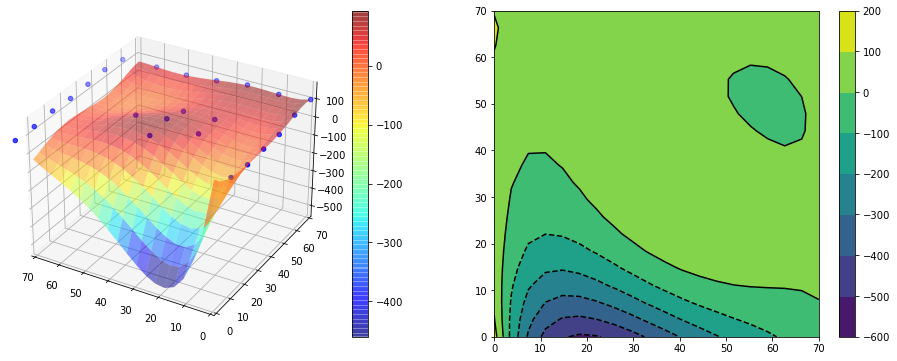

In [19]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

# The training set
datapoints = np.array([
    [12.5,70,81.32], [25,70,88.54], [37.5,70,67.58], [50,70,55.32], 
    [62.5,70,56.84], [77,70,49.52], [0,11.5,71.32], [77,57.5,67.20], 
    [0,23,58.54], [25,46,51.32], [37.5,46,49.52], [0,34.5,63.22], 
    [25,34.5,48.32], [37.5,34.5,82.30], [50,34.5,56.42], [77,34.5,48.32], 
    [37.5,23,67.32], [0,46,64.20], [77,11.5,41.89], [77,46,55.54], 
    [77,23,52.22], [0,57.5,93.72], [0,70,98.20], [77,0,42.32]
    ])
X = datapoints[:,0:2]
Y = datapoints[:,-1]

# 5 degree polynomial features
deg_of_poly = 5
poly = PolynomialFeatures(degree=deg_of_poly)
X_ = poly.fit_transform(X)
# Fit linear model
clf = linear_model.LinearRegression()
clf.fit(X_, Y)

# The test set, or plotting set
N = 20
Length = 70
predict_x0, predict_x1 = np.meshgrid(np.linspace(0, Length, N), 
                                     np.linspace(0, Length, N))
predict_x = np.concatenate((predict_x0.reshape(-1, 1), 
                            predict_x1.reshape(-1, 1)), 
                           axis=1)
predict_x_ = poly.fit_transform(predict_x)
predict_y = clf.predict(predict_x_)

# Plot
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(predict_x0, predict_x1, predict_y.reshape(predict_x0.shape), 
                        rstride=1, cstride=1, cmap=cm.jet, alpha=0.5)
ax1.scatter(datapoints[:, 0], datapoints[:, 1], datapoints[:, 2], c='b', marker='o')

ax1.set_xlim((70, 0))
ax1.set_ylim((0, 70))
fig.colorbar(surf, ax=ax1)
ax2 = fig.add_subplot(122)
cs = ax2.contourf(predict_x0, predict_x1, predict_y.reshape(predict_x0.shape))
ax2.contour(cs, colors='k')
fig.colorbar(cs, ax=ax2)
plt.show()
